In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy import stats
import distfit as distfit

import os
os.getcwd()
sns.set(rc={'figure.figsize':(20,10)})

In [6]:
data = pd.read_csv("Flight_delay.csv")
data.columns

Index(['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Org_Airport', 'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Data Dictionary
DayOfWeek → 1 (Monday) - 7 (Sunday)
Date → Scheduled date
DepTime → Actual departure time (local, hhmm)
ArrTime → Actual arrival time (local, hhmm)
CRSArrTime → Scheduled arrival time (local, hhmm)
UniqueCarrier → Unique carrier code
Airline → Airline company
FlightNum → flight number
TailNum → plane tail number
ActualElapsedTime → Actual time an airplane spends in the air(in minutes) with TaxiIn/Out
CRSElapsedTime → CRS Elapsed Time of Flight (estimated elapse time), in minutes
AirTime → Flight Time (in minutes)
ArrDelay → Difference in minutes between scheduled and actual arrival time
Origin → Origin IATA(International Air Transport Association) airport code
Org_Airport → Origin Airport Name
Dest → Destination IATA code
Dest_Airport → Destination Airport Name
Distance → Distance between airports (miles)
TaxiIn → Wheels down and arrival at the destination airport gate, in minutes
TaxiOut → The time elapsed between departure from the origin airport gate and wheels off, in minutes
Cancelled → Was the flight canceled?
CancellationCode → Reason for cancellation
Diverted → 1 = yes, 0 = no
CarrierDelay → Flight delay due to carrier(e.g. maintenance or crew problems, aircraft cleaning, fueling, etc), 0 = No, yes = (in minutes)
WeatherDelay → Flight delay due to weather, 0 = No, yes = (in minutes)
NASDelay → Flight delay by NSA(National Aviation System), 0 = No, yes = (in minutes)
SecurityDelay → Flight delay by this reason, 0 = No, yes = (in minutes)
LateAircraftDelay → Flight delay by this reason, 0 = No, yes = (in minutes)

In [7]:
data.info()
# org_airport dan dest_airport memiliki beberapa missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484551 entries, 0 to 484550
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DayOfWeek          484551 non-null  int64 
 1   Date               484551 non-null  object
 2   DepTime            484551 non-null  int64 
 3   ArrTime            484551 non-null  int64 
 4   CRSArrTime         484551 non-null  int64 
 5   UniqueCarrier      484551 non-null  object
 6   Airline            484551 non-null  object
 7   FlightNum          484551 non-null  int64 
 8   TailNum            484551 non-null  object
 9   ActualElapsedTime  484551 non-null  int64 
 10  CRSElapsedTime     484551 non-null  int64 
 11  AirTime            484551 non-null  int64 
 12  ArrDelay           484551 non-null  int64 
 13  DepDelay           484551 non-null  int64 
 14  Origin             484551 non-null  object
 15  Org_Airport        483374 non-null  object
 16  Dest               4

In [8]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,484541,484542,484543,484544,484545,484546,484547,484548,484549,484550
DayOfWeek,4,4,4,4,4,4,4,4,4,4,...,7,3,7,2,4,5,6,2,7,1
Date,03-01-2019,03-01-2019,03-01-2019,03-01-2019,03-01-2019,03-01-2019,03-01-2019,03-01-2019,03-01-2019,03-01-2019,...,29-06-2019,04-06-2019,08-06-2019,10-06-2019,12-06-2019,13-06-2019,14-06-2019,17-06-2019,22-06-2019,23-06-2019
DepTime,1829,1937,1644,1452,1323,1416,1657,1422,2107,1812,...,1308,1617,1623,1623,1545,1609,1616,1617,1607,1608
ArrTime,1959,2037,1845,1640,1526,1512,1754,1657,2334,1927,...,1715,1945,1957,2003,1944,1942,1954,2002,1941,1933
CRSArrTime,1925,1940,1725,1625,1510,1435,1735,1610,2230,1815,...,1640,1915,1915,1915,1915,1915,1915,1915,1915,1915
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,...,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA
Airline,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,...,American Airlines Inc.,American Airlines Inc.,American Airlines Inc.,American Airlines Inc.,American Airlines Inc.,American Airlines Inc.,American Airlines Inc.,American Airlines Inc.,American Airlines Inc.,American Airlines Inc.
FlightNum,3920,509,1333,675,4,54,623,188,362,422,...,1494,1496,1496,1496,1496,1496,1496,1496,1496,1496
TailNum,N464WN,N763SW,N334SW,N286WN,N674AA,N643SW,N724SW,N215WN,N798SW,N779SW,...,N584AA,N405AA,N511AA,N499AA,N498AA,N510AA,N559AA,N505AA,N421AA,N487AA
ActualElapsedTime,90,240,121,228,123,56,57,155,147,135,...,187,148,154,160,179,153,158,165,154,145


In [9]:
data.describe()

,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.0,484551.0,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000
mean,3.991605,1564.477865,1617.784438,1652.129929,2139.207386,134.810422,131.400761,108.877134,60.907764,57.498086,752.142689,6.782413,19.150876,0.0,0.0,17.419440,3.153284,13.599421,0.082033,26.653587
std,1.971466,452.235219,583.637660,466.096216,1812.677071,74.070374,71.542531,70.113513,56.975420,55.991012,571.631124,5.555816,15.309747,0.0,0.0,39.417893,19.503657,31.454655,1.884774,40.535994
min,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,-21.000000,0.000000,15.000000,6.000000,31.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1234.000000,1327.000000,1339.000000,629.000000,80.000000,79.000000,57.000000,25.000000,23.000000,331.000000,4.000000,11.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1620.000000,1737.000000,1723.000000,1514.000000,116.000000,114.000000,90.000000,42.000000,40.000000,599.000000,5.000000,15.000000,0.0,0.0,2.000000,0.000000,1.000000,0.000000,13.000000
75%,6.000000,1928.000000,2049.000000,2025.000000,3683.000000,168.000000,162.000000,139.000000,76.000000,72.000000,992.000000,8.000000,22.000000,0.0,0.0,19.000000,0.000000,13.000000,0.000000,36.000000
max,7.000000,2400.000000,2400.000000,2359.000000,8403.000000,727.000000,602.000000,609.000000,1707.000000,1710.000000,4502.000000,207.000000,383.000000,0.0,0.0,1707.000000,1148.000000,1357.000000,392.000000,1254.000000


In [10]:
data.isnull().sum()
print(data["Org_Airport"].isnull().sum() / data["Org_Airport"].count(), data["Dest_Airport"].isnull().sum() / data["Dest_Airport"].count())
#Org_Airport dan Dest_Airport memiliki sedikit missing value
#namun kita bisa gunakan kolom "Origin" dan "Dest" untuk menggantikan kedua kolom tersebut

0.002434967540662096 0.0030616554054054054


In [11]:
#mencari kolom yang bisa didrop karena hanya memiliki satu value
for col in data.columns:
    if(len(data[col].unique())==1):
        print(col)


Cancelled
CancellationCode
Diverted


In [12]:
data.drop(["Cancelled", "CancellationCode", "Diverted", "Org_Airport", "Dest_Airport"], axis=1, inplace=True)

In [13]:
data["TotalDelay"] = data["LateAircraftDelay"] + data["SecurityDelay"] + data["NASDelay"] + data["WeatherDelay"] + data["CarrierDelay"]
#membuat kolom total delay

dates = data["Date"].str.split("-", expand=True)
data["Month"] = dates[1].astype(int)
data["Year"] = dates[2]

print(data["Year"].unique())
#data hanya dari tahun 2019

print(data["Month"].unique())
#data hanya dari bulan 1 sampai 6


['2019']
[1 2 3 4 5 6]


In [14]:
print(np.any((data["LateAircraftDelay"] + data["SecurityDelay"] + data["NASDelay"] + data["WeatherDelay"] + data["CarrierDelay"])==0))
#Table hanya mengandung data pesawat yang terdelay

False


<Axes: >

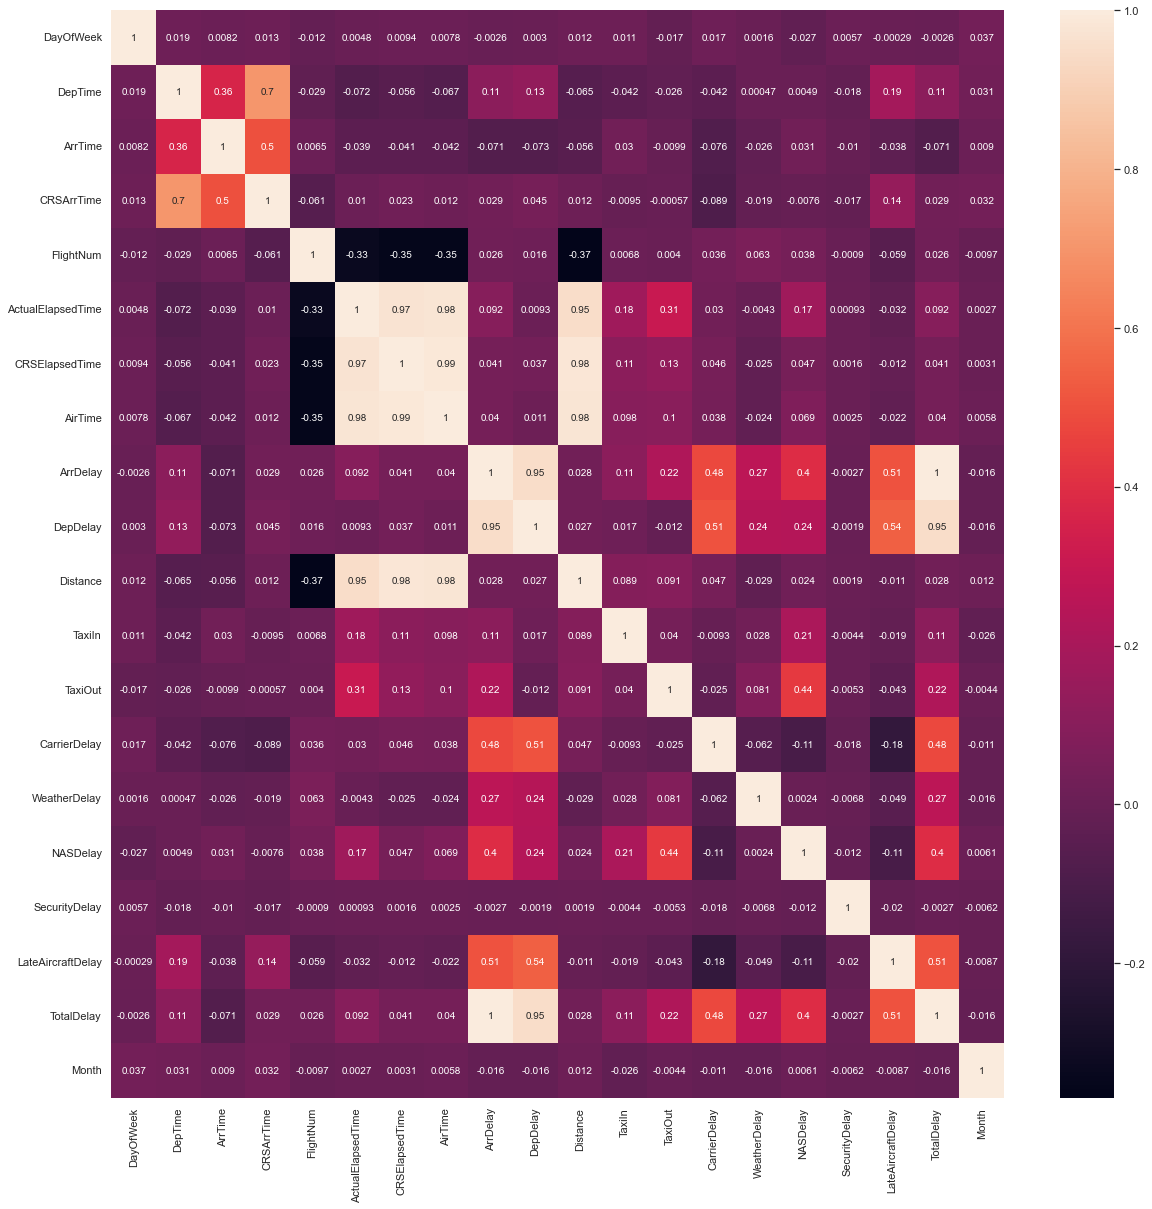

In [15]:
plt.subplots(figsize=(20,20))
corr_mat = data.corr()
sns.heatmap(corr_mat, annot=True)

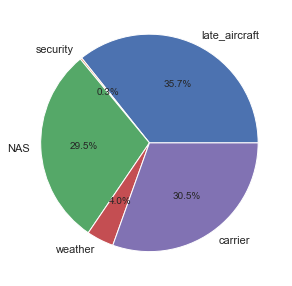

In [16]:
#Perbandingan kontributor delay
delay_contribution_count = {
    "late_aircraft":data[data["LateAircraftDelay"]>0]["LateAircraftDelay"].count(),
    "security":data[data["SecurityDelay"]>0]["SecurityDelay"].count(),
    "NAS":data[data["NASDelay"]>0]["NASDelay"].count(),
    "weather":data[data["WeatherDelay"]>0]["WeatherDelay"].count(),
    "carrier":data[data["CarrierDelay"]>0]["CarrierDelay"].count()
}

plt.subplots(figsize=(5,5))
plt.pie(delay_contribution_count.values(), labels=delay_contribution_count.keys(), autopct='%.1f%%')
plt.show()

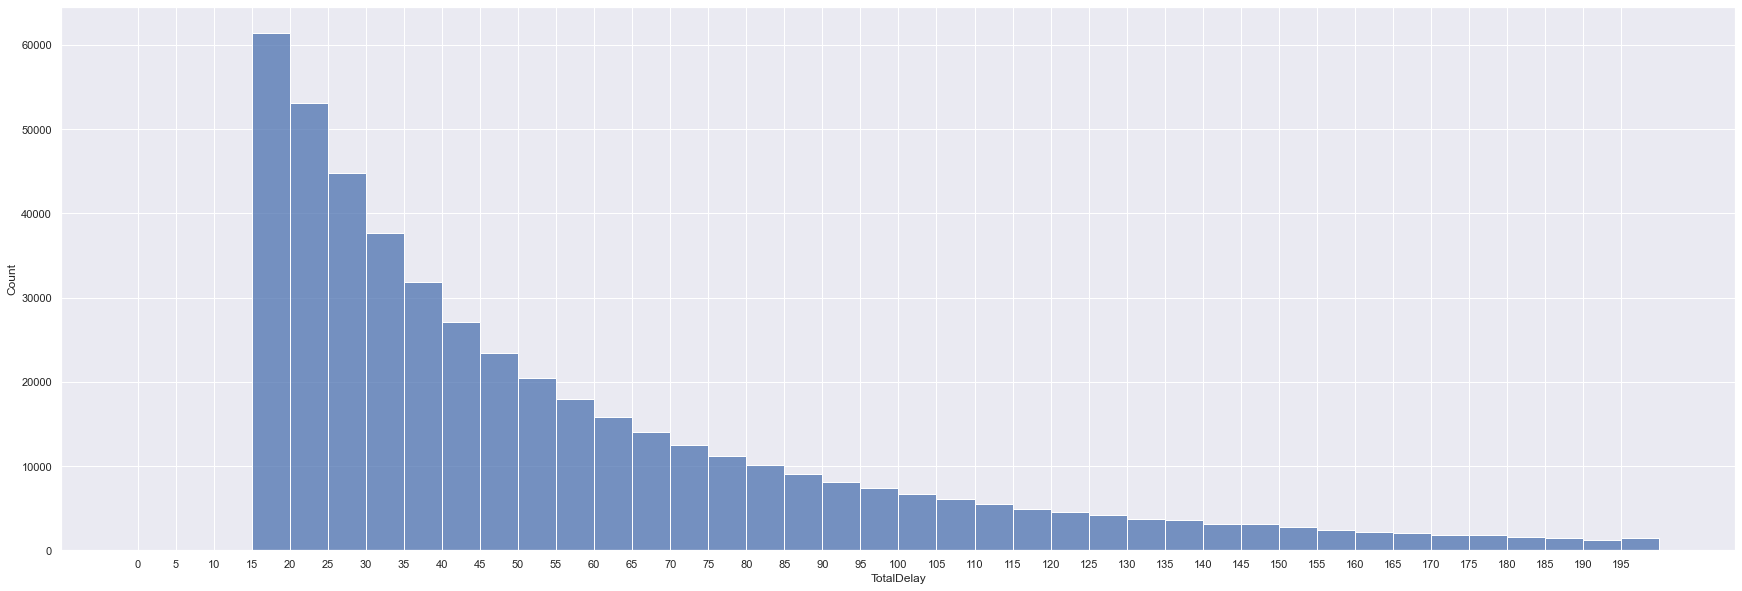

In [17]:
#Distribusi total delay
fig, ax = plt.subplots(figsize=(30, 10))
bins = np.histogram_bin_edges(data["TotalDelay"], bins=40, range=(0, 200))
p = sns.histplot(data["TotalDelay"], bins=bins)
p.set_xticks(range(0, 200, 5))
plt.show()

In [18]:
def count_outliers(col):
    outliers=0
    for i in scipy.stats.zscore(data[col]):
        if(i>=3):
            outliers+=1
    return outliers
            
print(count_outliers("TotalDelay"))

8806


[69221.57142857143, 69221.57142857143, 69221.57142857143, 69221.57142857143, 69221.57142857143, 69221.57142857143, 69221.57142857143]


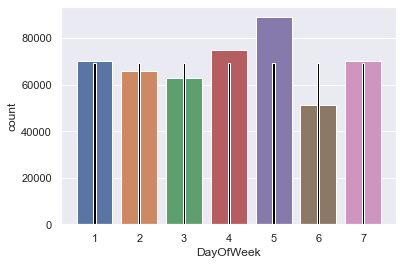

In [19]:
col = "DayOfWeek"
DayOfWeek_DelayCount_observed = data.groupby(["DayOfWeek"]).count()["Date"]
DayOfWeek_DelayCount_expected = [sum(DayOfWeek_DelayCount_observed)/len(DayOfWeek_DelayCount_observed) for _ in range(len(DayOfWeek_DelayCount_observed))] #we expect a uniform distribution of amount of delay
sns.countplot(data[col])
print(DayOfWeek_DelayCount_expected)
plt.bar(x=[i for i in range(7)], height=DayOfWeek_DelayCount_expected, color="black", width=0.05)
plt.show()

In [20]:
#chi square goodness of fit test to see if the variation of delay counts throughout days of the week is due to random chance or not


#null hypothesis = there is no significant difference between the observed data and the expecred data
stat, p = stats.chisquare(DayOfWeek_DelayCount_observed, f_exp=DayOfWeek_DelayCount_expected)
print(stat, p) 
#we use alpha = 0.05
#p value is small enough so observed data is significantly different from expected value
#The day of the week has an influence on the number of delays

11473.360880485232 0.0


<BarContainer object of 6 artists>

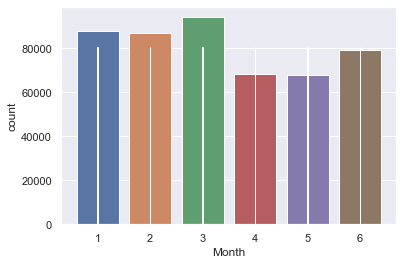

In [21]:
Month_DelayCount_observed = data.groupby("Month").count()["Date"]
Month_DelayCount_expected = [sum(Month_DelayCount_observed)/len(Month_DelayCount_observed) for _ in range(len(Month_DelayCount_observed))]

sns.countplot(data["Month"])
plt.bar(x=[i for i in range(len(Month_DelayCount_expected))], height=Month_DelayCount_expected, width=0.01, color="black")

In [22]:
# anova on day of week
days = []
for i in range(1,8):
    days.append(data.loc[data["DayOfWeek"]==i, "TotalDelay"])

stat, p = stats.f_oneway(days[0], days[1], days[2], days[3], days[4], days[5], days[6])

print(stat, p)
# reject null hypothesis that mean of totalDelay for DayOfWeek is statistically similar

145.48546982283085 3.973817159627728e-185


In [23]:
stat, p = stats.chisquare(Month_DelayCount_observed, f_exp=Month_DelayCount_expected)
print(stat, p)

7331.325389897039 0.0


In [24]:
data["ArrTimeMinutes"] = (data["ArrTime"]//100)*60 + data["ArrTime"]%100
data["DepTimeMinutes"] = (data["DepTime"]//100)*60 + data["DepTime"]%100


In [25]:
used = ["DepTimeMinutes", "Distance", "DayOfWeek", "TaxiIn", "AirTime"]

In [26]:
#split data into training and testing
train, test = train_test_split(data, test_size=0.3)

y_train = train["ArrTimeMinutes"]
x_train = train[used]

y_test = test["ArrTimeMinutes"]
x_test = test[used]

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_samples=10000)
model.fit(x_train, y_train)



RandomForestRegressor(max_samples=1000)

In [34]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)
print(mean_squared_error(y_test, y_pred, squared=False))

218.58215128252004
